In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/mock_kaggle.csv')

# Check the first few rows of your dataset
print(df.head())


         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29


         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29
          data  venda  estoque  preco
0   2014-01-01      0     4972   1.29
1   2014-01-02     70     4902   1.29
2   2014-01-03     59     4843   1.29
3   2014-01-04     93     4750   1.29
4   2014-01-05     96     4654   1.29
..         ...    ...      ...    ...
932 2016-07-27     98     3179   2.39
933 2016-07-28    108     3071   2.39
934 2016-07-29    128     4095   2.39
935 2016-07-30    270     3825   2.39
936 2016-07-31    183     3642   2.39

[937 rows x 4 columns]


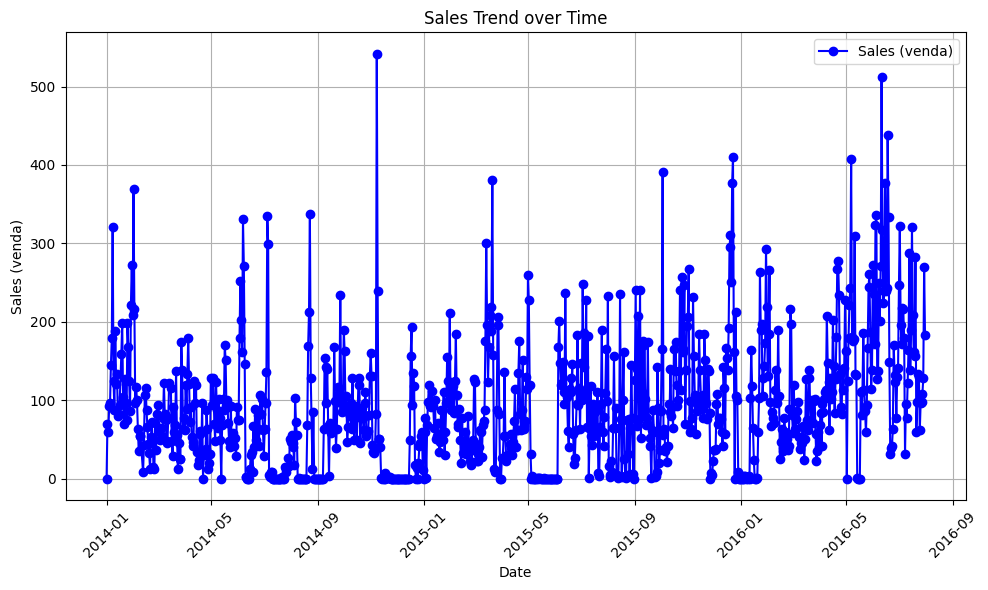

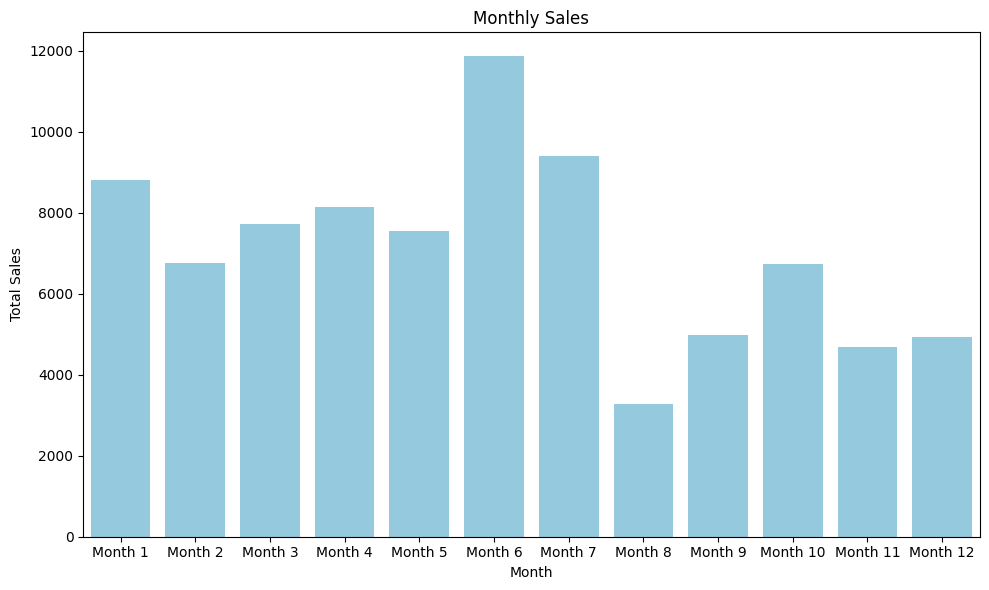

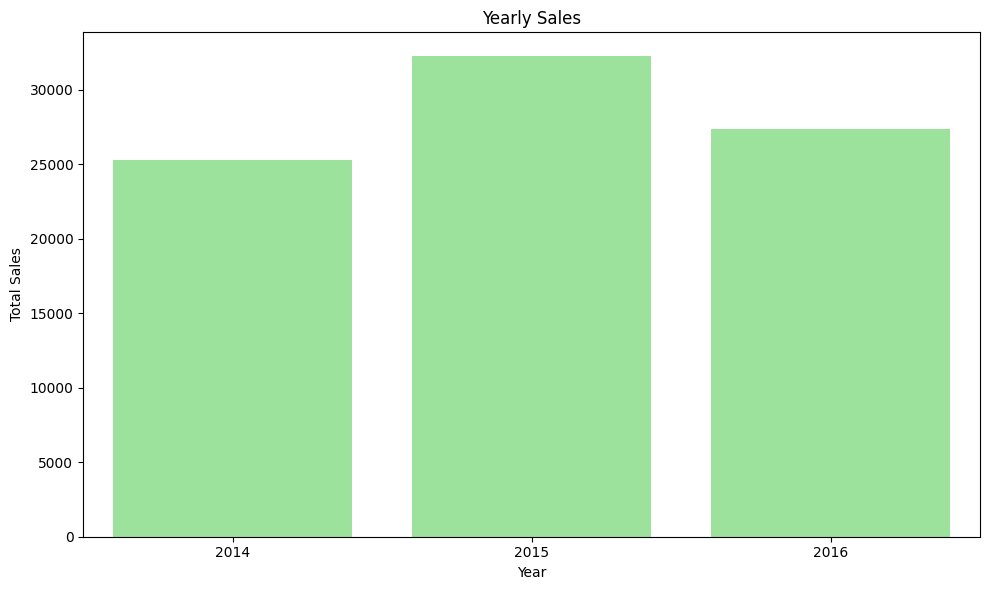

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/mock_kaggle.csv')

# Check the first few rows of your dataset
print(df.head())



# Convert 'data' column to datetime type
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Display the DataFrame to verify data
print(df)

# Sales Trend Plot (Venda vs Date)
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['venda'], marker='o', linestyle='-', color='b', label='Sales (venda)')
plt.title('Sales Trend over Time')
plt.xlabel('Date')
plt.ylabel('Sales (venda)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# You can also add a monthly or yearly analysis
# Extract month and year from the 'data' column
df['month'] = df['data'].dt.month
df['year'] = df['data'].dt.year

# Calculate monthly sales (sum of 'venda' for each month)
monthly_sales = df.groupby('month')['venda'].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=monthly_sales.index-1, labels=[f'Month {i}' for i in monthly_sales.index])
plt.tight_layout()
plt.show()

# Yearly Sales (in case you have multiple years)
yearly_sales = df.groupby('year')['venda'].sum()

# Plot yearly sales trend
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, color='lightgreen')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



In [ ]:
pip install xgboost


/tmp/ipython-input-4-1706202007.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['data'].dt.month
/tmp/ipython-input-4-1706202007.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['data'].dt.year
/tmp/ipython-input-4-1706202007.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

Root Mean Squared Error (RMSE): 74.10970937358681
Mean Absolute Error (MAE): 54.90416717529297


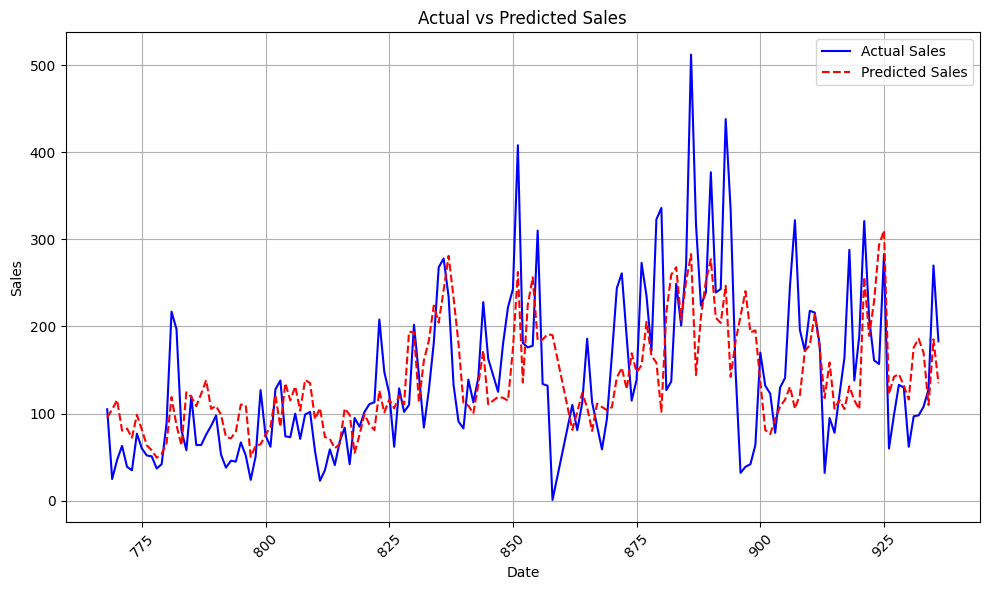

         date  predicted_sales
0  2016-08-01       184.063385
1  2016-08-02       189.332336
2  2016-08-03       236.462097
3  2016-08-04       201.822800
4  2016-08-05       189.098190
5  2016-08-06       189.036362
6  2016-08-07       132.031479
7  2016-08-08       184.063385
8  2016-08-09       189.332336
9  2016-08-10       236.462097
10 2016-08-11       201.822800
11 2016-08-12       189.098190
12 2016-08-13       189.036362
13 2016-08-14       132.031479
14 2016-08-15       184.063385
15 2016-08-16       189.332336
16 2016-08-17       236.462097
17 2016-08-18       201.822800
18 2016-08-19       189.098190
19 2016-08-20       189.036362
20 2016-08-21       132.031479
21 2016-08-22       184.063385
22 2016-08-23       189.332336
23 2016-08-24       236.462097
24 2016-08-25       201.822800
25 2016-08-26       189.098190
26 2016-08-27       189.036362
27 2016-08-28       132.031479
28 2016-08-29       184.063385
29 2016-08-30       189.332336


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mock_kaggle.csv')

# Convert 'data' column to datetime type
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Clean data: remove rows with negative or zero sales
df = df[df['venda'] > 0]

# Feature engineering: Extract month, year, and weekday
df['month'] = df['data'].dt.month
df['year'] = df['data'].dt.year
df['weekday'] = df['data'].dt.weekday  # Monday=0, Sunday=6

# Create additional features like rolling averages or lag features
df['rolling_avg'] = df['venda'].rolling(window=7).mean()  # 7-day rolling average

# Fill NaN values (resulting from rolling operation)
df['rolling_avg'] = df['rolling_avg'].fillna(df['venda'].mean())

# Define the features and target variable
X = df[['month', 'year', 'weekday', 'estoque', 'preco', 'rolling_avg']]  # Features
y = df['venda']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the features (important for XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='b')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='r', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict future sales for the next 30 days (assuming we have the most recent data)
future_dates = pd.date_range(df['data'].max(), periods=31, freq='D')[1:]  # 31 days, excluding the first date
future_features = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year,
    'weekday': future_dates.weekday,
    'estoque': [df['estoque'].iloc[-1]] * 30,  # Use last known stock value
    'preco': [df['preco'].iloc[-1]] * 30,      # Use last known price value
    'rolling_avg': [df['rolling_avg'].iloc[-1]] * 30  # Use last known rolling average
})

# Standardize future features
future_features_scaled = scaler.transform(future_features)

# Make future predictions
future_sales_pred = model.predict(future_features_scaled)

# Display future predictions
future_df = pd.DataFrame({'date': future_dates, 'predicted_sales': future_sales_pred})
print(future_df)


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mock_kaggle.csv')

# Clean the data
# Step 1: Convert 'data' column to datetime type
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Step 2: Remove rows with negative or zero sales
df = df[df['venda'] > 0]

# Step 3: Remove duplicates if any
df = df.drop_duplicates()

# Step 4: Check for missing values
print(df.isnull().sum())

# Step 5: Fill missing values (if any)
df = df.fillna(method='ffill')  # Forward fill for missing values, can also use 'bfill' or imputation techniques
# Feature Engineering
df['month'] = df['data'].dt.month  # Extract month
df['year'] = df['data'].dt.year    # Extract year
df['weekday'] = df['data'].dt.weekday  # Extract weekday (0=Monday, 6=Sunday)

# Create seasonal indicators (e.g., holidays)
df['is_holiday'] = df['month'].apply(lambda x: 1 if x == 12 else 0)  # Holiday flag for December

# Calculate 7-day rolling average for sales (short-term trend)
df['rolling_avg'] = df['venda'].rolling(window=7).mean()  # 7-day rolling average
df['rolling_avg'] = df['rolling_avg'].fillna(df['venda'].mean())  # Fill NaN with mean sales

# Monthly and Yearly averages for aggregation
monthly_avg_sales = df.groupby('month')['venda'].mean()
yearly_avg_sales = df.groupby('year')['venda'].mean()

# Add monthly and yearly sales averages as features
df['monthly_avg'] = df['month'].map(monthly_avg_sales)
df['yearly_avg'] = df['year'].map(yearly_avg_sales)

# Display the data to verify
print(df.head())
# Prepare the features and target variable
X = df[['month', 'year', 'weekday', 'estoque', 'preco', 'rolling_avg', 'monthly_avg', 'yearly_avg', 'is_holiday']]
y = df['venda']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


data       0
venda      0
estoque    0
preco      0
dtype: int64
        data  venda  estoque  preco  month  year  weekday  is_holiday  \
1 2014-01-02     70     4902   1.29      1  2014        3           0   
2 2014-01-03     59     4843   1.29      1  2014        4           0   
3 2014-01-04     93     4750   1.29      1  2014        5           0   
4 2014-01-05     96     4654   1.29      1  2014        6           0   
5 2014-01-06    145     4509   1.29      1  2014        0           0   

   rolling_avg  monthly_avg  yearly_avg  
1   102.824242        107.5   86.496575  
2   102.824242        107.5   86.496575  
3   102.824242        107.5   86.496575  
4   102.824242        107.5   86.496575  
5   102.824242        107.5   86.496575  


/tmp/ipython-input-5-3758159492.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for missing values, can also use 'bfill' or imputation techniques


Root Mean Squared Error (RMSE): 74.27384468240653
Mean Absolute Error (MAE): 55.1676139831543


In [ ]:
# Prepare the forecast data for Power BI (both actual and predicted)
forecast_data = pd.DataFrame({
    'date': df['data'],
    'actual_sales': df['venda'],
    'predicted_sales': model.predict(scaler.transform(df[['month', 'year', 'weekday', 'estoque', 'preco', 'rolling_avg', 'monthly_avg', 'yearly_avg', 'is_holiday']])),
})

# Export to CSV for Power BI
forecast_data.to_csv('/content/forecast_data.csv', index=False)


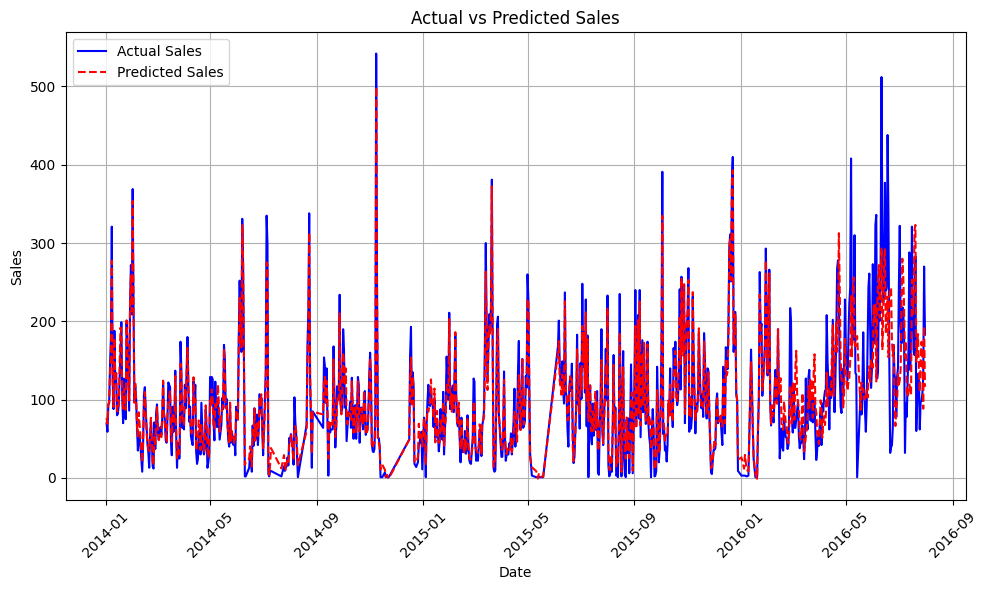

In [ ]:
# Prepare the forecast data for actual vs predicted sales
forecast_data = pd.DataFrame({
    'date': df['data'],  # Actual date
    'actual_sales': df['venda'],  # Actual sales (venda)
    'predicted_sales': model.predict(scaler.transform(df[['month', 'year', 'weekday', 'estoque', 'preco', 'rolling_avg', 'monthly_avg', 'yearly_avg', 'is_holiday']])),  # Predicted sales
})

# Export to CSV for Power BI
forecast_data.to_csv('/content/forecast_data.csv', index=False)

# Plot actual vs predicted sales for visualization in Power BI
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast_data['date'], forecast_data['actual_sales'], label='Actual Sales', color='b')
plt.plot(forecast_data['date'], forecast_data['predicted_sales'], label='Predicted Sales', color='r', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Monthly Sales Comparison (Sum of 'venda' for each month)
monthly_sales = df.groupby('month')['venda'].sum()

# Yearly Sales Comparison (Sum of 'venda' for each year)
yearly_sales = df.groupby('year')['venda'].sum()

# Display the results (can be exported for Power BI)
monthly_sales.to_csv('/content/monthly_sales.csv', header=True)
yearly_sales.to_csv('/content/yearly_sales.csv', header=True)



In [ ]:
# Assuming your data contains 'category', 'store', and 'region' columns
df['category'] = 'Category A'  # Example - you can populate this with your data
df['store'] = 'Store 1'        # Example - populate with store data
df['region'] = 'North'         # Example - populate with region data

# Now export data with these new columns
df.to_csv('/content/sales_with_filters.csv', index=False)


In [ ]:
# Check the columns in your dataframe
print(df.columns)

# Assuming we have a 'category' column, let's group by category instead of item
# Grouping by 'category' and summing the sales ('venda') for each category
top_selling_categories = df.groupby('category')['venda'].sum().sort_values(ascending=False).head(10)

# Or, if you want to group by store:
top_selling_stores = df.groupby('store')['venda'].sum().sort_values(ascending=False).head(10)

# Or, if you want to group by region:
top_selling_regions = df.groupby('region')['venda'].sum().sort_values(ascending=False).head(10)

# Now you can export these results for Power BI or further analysis
top_selling_categories.to_csv('/content/top_selling_categories.csv', header=True)
top_selling_stores.to_csv('/content/top_selling_stores.csv', header=True)
top_selling_regions.to_csv('/content/top_selling_regions.csv', header=True)


Index(['data', 'venda', 'estoque', 'preco', 'month', 'year', 'weekday',
       'is_holiday', 'rolling_avg', 'monthly_avg', 'yearly_avg', 'category',
       'store', 'region'],
      dtype='object')


In [ ]:
# Group by month and find low-selling months
low_selling_months = df.groupby('month')['venda'].sum().sort_values().head(3)

# Export the low-selling months data
low_selling_months.to_csv('/content/low_selling_months.csv', header=True)


In [ ]:
# Calculate KPIs like RMSE, MAE, etc.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
total_sales = df['venda'].sum()

# Create a summary for business decisions
kpi_data = {
    'RMSE': rmse,
    'MAE': mae,
    'Total Sales': total_sales
}

# Export KPI data for Power BI
kpi_df = pd.DataFrame(list(kpi_data.items()), columns=['KPI', 'Value'])
kpi_df.to_csv('/content/kpi_data.csv', index=False)
